# Inicializovanie

In [157]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler

# Načítanie JSON dát zo súboru
file_path = 'diplom-test-d24e5-default-rtdb-export.json'
with open(file_path, 'r') as file:
    json_data = json.load(file)

# Nastavenie štýlu pre vizualizácie pomocou seaborn
sns.set_theme(style="whitegrid")
seaborncolor = 'white'  # Použitá farba v seaborn vizualizáciách

# Nastavenie možností zobrazovania pre pandas DataFrame
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)

 # Funkcie na zrovnávanie dát z JSON formátu do tabuľkového formátu DataFrame.
def flatten_data_game(data):
    flat_list = []
    for key, value in data['Storage']['Game'].items():
        # Konvertovanie časového údaju na formát pandas DateTime
        value['timestamp'] = pd.to_datetime(value['timestamp'], unit='ms')
        flat_list.append(value)
    return pd.DataFrame(flat_list)


def flatten_data_video(data):
    flat_list = []
    for key, value in data['Storage']['Video'].items():
        # Konvertovanie časového údaju na formát pandas DateTime
        value['timestamp'] = pd.to_datetime(value['timestamp'], unit='ms')
        flat_list.append(value)
    return pd.DataFrame(flat_list)

def flatten_data_relaxed(data):
    flat_list = []
    for key, value in data['Storage']['RelaxedState'].items():
        # Konvertovanie časového údaju na formát pandas DateTime
        value['timestamp'] = pd.to_datetime(value['timestamp'], unit='ms')
        flat_list.append(value)
    return pd.DataFrame(flat_list)

# Konvertovanie dát na tabuľku
df_game = flatten_data_game(json_data)
df_video = flatten_data_video(json_data)
df_relaxed = flatten_data_relaxed(json_data)

In [158]:
df_video

,breathingFrequency,breathingIntensity,gsr,heartRate,levelID,levelName,timestamp,userID,userSessionNr
0,6,55,233.449997,78,0,safe_zone_start,2024-04-14 07:05:43.605,2,1
1,6,55,222.449997,78,0,safe_zone_start,2024-04-14 07:05:44.624,2,1
2,6,35,208.850006,78,0,safe_zone_start,2024-04-14 07:05:45.627,2,1
3,6,20,201.750000,77,0,safe_zone_start,2024-04-14 07:05:46.633,2,1
4,6,20,193.649994,78,0,safe_zone_start,2024-04-14 07:05:47.640,2,1
...,...,...,...,...,...,...,...,...,...
3858,0,0,652.299988,61,12,go_to_top_2,2024-04-15 17:24:08.900,17,1
3859,0,0,651.750000,62,12,go_to_top_2,2024-04-15 17:24:09.905,17,1
3860,0,0,652.000000,62,12,go_to_top_2,2024-04-15 17:24:10.909,17,1
3861,0,0,652.150024,62,12,go_to_top_2,2024-04-15 17:24:11.914,17,1


In [159]:
df_game

,breathingFrequency,breathingIntensity,gsr,heartRate,levelID,levelName,timestamp,userID,userSessionNr
0,0,0,177.199997,88,0,safe_zone_start,2024-04-14 07:20:07.382,2,1
1,0,0,178.350006,88,0,safe_zone_start,2024-04-14 07:20:08.385,2,1
2,0,0,179.300003,88,0,safe_zone_start,2024-04-14 07:20:09.388,2,1
3,0,0,179.750000,87,0,safe_zone_start,2024-04-14 07:20:10.391,2,1
4,0,0,179.949997,86,0,safe_zone_start,2024-04-14 07:20:11.395,2,1
...,...,...,...,...,...,...,...,...,...
22230,0,0,484.549988,71,12,go_to_top_2,2024-04-15 17:56:25.046,17,1
22231,0,0,485.700012,70,12,go_to_top_2,2024-04-15 17:56:26.048,17,1
22232,0,0,486.899994,72,12,go_to_top_2,2024-04-15 17:56:27.050,17,1
22233,0,0,487.149994,72,12,go_to_top_2,2024-04-15 17:56:28.299,17,1


In [160]:
df_relaxed

,gsr_avg,gsr_max,gsr_min,heartRate_avg,heartRate_max,heartRate_min,humidity,respirationIntensity_avg,respirationIntensity_max,respirationIntensity_min,respirationRate_avg,respirationRate_max,respirationRate_min,temperature,timestamp,userID,userSessionNr
0,247.736160,268.250000,220.050003,74.336136,87,67,28,11.333333,139,0,1.750000,6,0,23.100000,2024-04-14 07:04:02.429,2,1
1,535.492798,559.200012,513.700012,87.840340,92,50,30,5.050000,44,0,1.975000,6,0,23.500000,2024-04-14 07:58:05.779,3,1
2,534.471313,570.599976,489.500000,81.408333,86,75,33,3.125000,52,0,0.408333,4,0,24.100000,2024-04-14 09:08:08.109,4,1
3,386.784119,470.000000,309.149994,72.966385,87,65,24,18.108334,267,0,2.125000,8,0,24.100000,2024-04-14 11:16:05.139,5,1
4,501.376465,529.099976,460.000000,65.789917,81,59,23,4.083333,67,0,0.466667,6,0,24.400000,2024-04-14 12:20:53.384,6,1
5,192.705887,211.199997,153.800003,91.344536,102,82,23,3.175000,41,0,1.483333,8,0,25.000000,2024-04-14 13:18:08.813,7,1
6,4.957563,16.200001,1.100000,71.000000,74,68,23,0.291667,5,0,0.366667,2,0,25.100000,2024-04-14 14:12:52.775,8,1
7,19.915964,42.400002,1.200000,88.050423,94,82,24,16.983334,92,0,6.433333,16,2,25.299999,2024-04-14 15:13:21.004,9,1
8,239.881500,309.600006,183.050003,70.226891,75,67,20,2.300000,27,0,1.133333,2,0,25.400000,2024-04-14 16:04:47.186,10,1
9,342.268402,355.750000,319.149994,80.504204,85,76,20,0.000000,0,0,0.000000,0,0,25.400000,2024-04-14 16:39:02.807,11,1


# Príprava údajov

In [161]:
# Filtrácia riadkov - používateľ 14 bol jediný, kto potreboval opakovať hru, takže vyradíme prvú reláciu, aby sme zachovali len druhú
filtered_df_game = df_game[(df_game['userID'] != 14) | (df_game['userSessionNr'] != 1)]
df_game = filtered_df_game.copy()

# Odstránenie stĺpca userSessionNr z df_game, pretože teraz všetci používatelia majú len jednu reláciu
df_game = df_game.drop(['userSessionNr'], axis=1)
df_video = df_video.drop(['userSessionNr'], axis=1)
df_relaxed = df_relaxed.drop(['userSessionNr', 'timestamp'], axis=1)

# Inverzia hodnôt stĺpca gsr v df_video a df_game, pretože chceme zobraziť reakciu a nie odpor
df_video['gsr'] = 700 - df_video['gsr']
df_game['gsr'] = 700 - df_game['gsr']

# Očistíme DataFrame df_video a pridáme stĺpec "timeIndex".
row_count = 0
current_user_id = None
row_counts = []

for index, row in df_video.iterrows():
    if row['userID'] != current_user_id:
        row_count = 1
        current_user_id = row['userID']
    else:
        row_count += 1
    
    row_counts.append(row_count)

df_video['timeIndex'] = row_counts
df_video['levelID'] = 13
df_video['levelName'] = "video"

# Vytvorenie masky na identifikáciu riadkov, kde sa userID aj levelID zhodujú s predchádzajúcim riadkom kvôli situáciám, kedy monitorovanie začalo pred začiatkom hry, čo viedlo k tomu, že sme dostali údaje z predchádzajúceho používateľa.
mask = (df_game['userID'] != df_game['userID'].shift(1)) & (df_game['levelID'] == 12)

# Odstránenie súvislých riadkov, kým podmienka nie je splnená
while any(mask):
    df_game = df_game[~mask]
    mask = (df_game['userID'] != df_game['userID'].shift(1)) & (df_game['levelID'] == 12)

# Resetovanie indexu, ak je to potrebné
df_game.reset_index(drop=True, inplace=True)

# Transpozícia dátových rámcov na jednoduchšie spracovanie
df_game_transposed = df_game.melt(id_vars=["timestamp", "userID"], value_vars=["heartRate", "gsr", 'breathingIntensity','breathingFrequency'], 
                                var_name="variable", value_name="value")
df_video_transposed = df_video.melt(id_vars=["timestamp", "userID"], value_vars=["heartRate", "gsr", 'breathingIntensity','breathingFrequency'],
                                   var_name="variable", value_name="value")

df_video = pd.merge(df_video, df_relaxed, on='userID').sort_values(by='timestamp')
df_game = pd.merge(df_game, df_relaxed, on='userID').sort_values(by='timestamp')


column_mapping = {
    'breathingIntensity': 'respirationIntensity',
    'breathingFrequency': 'respirationRate'
}

# Rename the columns using the mapping
df_game.rename(columns=column_mapping, inplace=True)
df_video.rename(columns=column_mapping, inplace=True)

# Definovanie mapovacieho slovníka pre názvy úrovní
level_mapping = {
    'safe_zone_start': 'Rest',
    'safe_zone_1': 'Rest',
    'safe_zone_2': 'Rest',
    'safe_zone_3': 'Rest',
    'safe_zone_4': 'Rest',
    'elevator1': 'Elevator',
    'elevator2': 'Elevator',
    'video': 'Video'
}

# Definovanie názvu stĺpca a príslušných hodnôt pre každý DataFrame
column_values_game = df_game['levelName'].map(level_mapping).fillna('Challenge')
column_values_video = df_video['levelName'].map(level_mapping).fillna('Challenge')

# Vloženie stĺpca na 6. pozíciu pre každý DataFrame
df_game.insert(6, 'level_category', column_values_game)
df_video.insert(6, 'level_category', column_values_video)

df_game_without_gsr = df_game.loc[:, ~df_game.columns.str.contains('gsr')]
df_video_without_gsr = df_video.loc[:, ~df_video.columns.str.contains('gsr')]

# Uchovávanie všetkých dát
df_game_full = df_game
df_video_full = df_video

# Odstránenie používateľov, ktorých údaje boli ohrozené, z rámce údajov
df_game = df_game[df_game['userID'] != 8]
df_game = df_game[df_game['userID'] != 9]
df_video = df_video[df_video['userID'] != 8]
df_video = df_video[df_video['userID'] != 9]

In [162]:
# Vypísať aktualizované DataFrame na overenie nového umiestnenia stĺpcov
df_game

,respirationRate,respirationIntensity,gsr,heartRate,levelID,levelName,level_category,timestamp,userID,gsr_avg,gsr_max,gsr_min,heartRate_avg,heartRate_max,heartRate_min,humidity,respirationIntensity_avg,respirationIntensity_max,respirationIntensity_min,respirationRate_avg,respirationRate_max,respirationRate_min,temperature
0,0,0,522.800003,88,0,safe_zone_start,Rest,2024-04-14 07:20:07.382,2,247.736160,268.250000,220.050003,74.336136,87,67,28,11.333333,139,0,1.750,6,0,23.100000
1,0,0,521.649994,88,0,safe_zone_start,Rest,2024-04-14 07:20:08.385,2,247.736160,268.250000,220.050003,74.336136,87,67,28,11.333333,139,0,1.750,6,0,23.100000
2,0,0,520.699997,88,0,safe_zone_start,Rest,2024-04-14 07:20:09.388,2,247.736160,268.250000,220.050003,74.336136,87,67,28,11.333333,139,0,1.750,6,0,23.100000
3,0,0,520.250000,87,0,safe_zone_start,Rest,2024-04-14 07:20:10.391,2,247.736160,268.250000,220.050003,74.336136,87,67,28,11.333333,139,0,1.750,6,0,23.100000
4,0,0,520.050003,86,0,safe_zone_start,Rest,2024-04-14 07:20:11.395,2,247.736160,268.250000,220.050003,74.336136,87,67,28,11.333333,139,0,1.750,6,0,23.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21440,0,0,215.450012,71,12,go_to_top_2,Challenge,2024-04-15 17:56:25.046,17,656.954163,658.799988,655.450012,63.084034,66,59,29,6.475000,49,0,1.525,5,0,24.299999
21441,0,0,214.299988,70,12,go_to_top_2,Challenge,2024-04-15 17:56:26.048,17,656.954163,658.799988,655.450012,63.084034,66,59,29,6.475000,49,0,1.525,5,0,24.299999
21442,0,0,213.100006,72,12,go_to_top_2,Challenge,2024-04-15 17:56:27.050,17,656.954163,658.799988,655.450012,63.084034,66,59,29,6.475000,49,0,1.525,5,0,24.299999
21443,0,0,212.850006,72,12,go_to_top_2,Challenge,2024-04-15 17:56:28.299,17,656.954163,658.799988,655.450012,63.084034,66,59,29,6.475000,49,0,1.525,5,0,24.299999


In [163]:
df_video

,respirationRate,respirationIntensity,gsr,heartRate,levelID,levelName,level_category,timestamp,userID,timeIndex,gsr_avg,gsr_max,gsr_min,heartRate_avg,heartRate_max,heartRate_min,humidity,respirationIntensity_avg,respirationIntensity_max,respirationIntensity_min,respirationRate_avg,respirationRate_max,respirationRate_min,temperature
0,6,55,466.550003,78,13,video,Video,2024-04-14 07:05:43.605,2,1,247.736160,268.250000,220.050003,74.336136,87,67,28,11.333333,139,0,1.750,6,0,23.100000
1,6,55,477.550003,78,13,video,Video,2024-04-14 07:05:44.624,2,2,247.736160,268.250000,220.050003,74.336136,87,67,28,11.333333,139,0,1.750,6,0,23.100000
2,6,35,491.149994,78,13,video,Video,2024-04-14 07:05:45.627,2,3,247.736160,268.250000,220.050003,74.336136,87,67,28,11.333333,139,0,1.750,6,0,23.100000
3,6,20,498.250000,77,13,video,Video,2024-04-14 07:05:46.633,2,4,247.736160,268.250000,220.050003,74.336136,87,67,28,11.333333,139,0,1.750,6,0,23.100000
4,6,20,506.350006,78,13,video,Video,2024-04-14 07:05:47.640,2,5,247.736160,268.250000,220.050003,74.336136,87,67,28,11.333333,139,0,1.750,6,0,23.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3858,0,0,47.700012,61,13,video,Video,2024-04-15 17:24:08.900,17,236,656.954163,658.799988,655.450012,63.084034,66,59,29,6.475000,49,0,1.525,5,0,24.299999
3859,0,0,48.250000,62,13,video,Video,2024-04-15 17:24:09.905,17,237,656.954163,658.799988,655.450012,63.084034,66,59,29,6.475000,49,0,1.525,5,0,24.299999
3860,0,0,48.000000,62,13,video,Video,2024-04-15 17:24:10.909,17,238,656.954163,658.799988,655.450012,63.084034,66,59,29,6.475000,49,0,1.525,5,0,24.299999
3861,0,0,47.849976,62,13,video,Video,2024-04-15 17:24:11.914,17,239,656.954163,658.799988,655.450012,63.084034,66,59,29,6.475000,49,0,1.525,5,0,24.299999


# Definovanie funkcií

In [176]:
# Funkcia na výpočet času stráveného v každom leveli hry a štatistík súvisiacich s biometrickými dátami.
def calculate_time_per_level(df):
    df = df.copy()
    df.loc[:, 'timestamp'] = pd.to_datetime(df['timestamp'])

    df_sorted = df.sort_values(by=['userID', 'timestamp']).copy()

    df_sorted['time_diff'] = df_sorted.groupby('userID')['timestamp'].diff()

    level_changes = df_sorted.groupby('userID')['levelID'].diff() != 0
    df_sorted.loc[level_changes, 'time_diff'] = pd.Timedelta(seconds=0)

    group = df_sorted.groupby(['userID', 'levelID', 'levelName'])

    time_per_level = group['time_diff'].sum().reset_index()
    stats = group[['heartRate', 'gsr', 'respirationIntensity', 'respirationRate']].agg(['min', 'max', 'mean']).reset_index()

    stats.columns = ['_'.join(col).strip() if col[1] else col[0] for col in stats.columns.values]

    time_per_level_stats = pd.merge(time_per_level, stats, on=['userID', 'levelID', 'levelName'])

    time_per_level_stats['time_spent'] = time_per_level_stats['time_diff'].dt.total_seconds().apply(
        lambda x: f"{int(x // 60):02d}:{int(x % 60):02d}"
    )

    time_per_level_stats.drop('time_diff', axis=1, inplace=True)

    for col in ['heartRate_min', 'heartRate_max', 'heartRate_mean', 
                'gsr_min', 'gsr_max', 'gsr_mean', 
                'respirationIntensity_min', 'respirationIntensity_max', 'respirationIntensity_mean',
                'respirationRate_min', 'respirationIntensity_max', 'respirationIntensity_mean']:
        time_per_level_stats[col] = time_per_level_stats[col].round(2)

    return time_per_level_stats

# Funkcia na výpočet času stráveného v každom leveli hry a štatistík súvisiacich s biometrickými dátami pre konkrétneho používateľa.
def calculate_time_per_level_specify_userid(df, user_id):
    df = df.copy()
    df = df[df['userID'] == user_id]
    df.loc[:, 'timestamp'] = pd.to_datetime(df['timestamp'])

    df_sorted = df.sort_values(by=['userID', 'timestamp']).copy()

    df_sorted['time_diff'] = df_sorted.groupby('userID')['timestamp'].diff()

    level_changes = df_sorted.groupby('userID')['levelID'].diff() != 0
    df_sorted.loc[level_changes, 'time_diff'] = pd.Timedelta(seconds=0)

    group = df_sorted.groupby(['userID', 'levelID', 'levelName'])

    time_per_level = group['time_diff'].sum().reset_index()
    stats = group[['heartRate', 'gsr', 'respirationIntensity', 'respirationRate']].agg(['min', 'max', 'mean']).reset_index()

    stats.columns = ['_'.join(col).strip() if col[1] else col[0] for col in stats.columns.values]

    time_per_level_stats = pd.merge(time_per_level, stats, on=['userID', 'levelID', 'levelName'])

    time_per_level_stats['time_spent'] = time_per_level_stats['time_diff'].dt.total_seconds().apply(
        lambda x: f"{int(x // 60):02d}:{int(x % 60):02d}"
    )

    time_per_level_stats.drop('time_diff', axis=1, inplace=True)

    for col in ['heartRate_min', 'heartRate_max', 'heartRate_mean', 
                'gsr_min', 'gsr_max', 'gsr_mean', 
                'respirationIntensity_min', 'respirationIntensity_max', 'respirationIntensity_mean',
                'respirationRate_min', 'respirationIntensity_max', 'respirationIntensity_mean']:
        time_per_level_stats[col] = time_per_level_stats[col].round(2)

    return time_per_level_stats

def summary_statistic_grouped_biosignals(df, column_name, levelID=None):

    # Filtrovanie DataFrame na základe levelID, ak je zadané
    if levelID is not None:
        df = df[df['levelID'] == levelID]
    

    if column_name == 'levelName':
        average_by_group = df.groupby(['levelName'])[['heartRate', 'gsr', 'respirationIntensity', 'respirationRate']].mean()
        levelID_mapping = df.groupby('levelName')['levelID'].first()
        # Zlúčenie 'levelID' s DataFrame average_by_group
        average_by_group = average_by_group.merge(levelID_mapping, left_index=True, right_index=True)
        # Zoradíme DataFrame podľa 'levelID'
        average_by_group = average_by_group.sort_values(by='levelID')
    else:
        # Výpočet priemerných hodnôt biosignálov pre každú skupinu používateľov
        average_by_group = df.groupby([column_name])[['heartRate', 'gsr', 'respirationIntensity', 'respirationRate']].mean()


    return average_by_group

def summary_statistic_grouped_biosignals_game_vs_relax(df, column_name, levelID=None):

    # Filtrovanie DataFrame na základe levelID, ak je zadané
    if levelID is not None:
        df = df[df['levelID'] == levelID]
    

    if column_name == 'levelName':
        average_by_group = df.groupby(['levelName'])[['heartRate', 'heartRate_avg', 'gsr', 'gsr_avg', 'respirationIntensity', 'respirationIntensity_avg', 'respirationRate', 'respirationRate_avg']].mean()
        levelID_mapping = df.groupby('levelName')['levelID'].first()
        # Zlúčenie 'levelID' s DataFrame average_by_group
        average_by_group = average_by_group.merge(levelID_mapping, left_index=True, right_index=True)
        # Zoradiť DataFrame podľa 'levelID'
        average_by_group = average_by_group.sort_values(by='levelID')
    else:
        # Výpočet priemerných hodnôt biosignálov pre každú skupinu používateľov
        average_by_group = df.groupby([column_name])[['heartRate', 'heartRate_avg', 'gsr', 'gsr_avg', 'respirationIntensity', 'respirationIntensity_avg', 'respirationRate', 'respirationRate_avg']].mean()

    column_mapping = {
        'heartRate': 'tep_VR',
        'heartRate_avg': 'tep_relax',
        'gsr': 'gsr_VR',
        'gsr_avg': 'gsr_relax',
        'respirationIntensity': 'int_resp_VR',
        'respirationIntensity_avg': 'int_resp_relax',
        'respirationRate': 'frekv_resp_VR',
        'respirationRate_avg': 'frekv_resp_relax'
    }   

    average_by_group.rename(columns=column_mapping, inplace=True)

    return average_by_group



In [177]:
average_by_group = summary_statistic_grouped_biosignals(df_game, 'levelName')
average_by_group

,heartRate,gsr,respirationIntensity,respirationRate,levelID
levelName,,,,,
safe_zone_start,85.148490,352.490911,3.579791,1.285890,0
elevator_1,85.562842,402.669946,5.715847,2.092896,1
safe_zone_1,83.294906,399.520912,4.391421,1.833780,2
laser_room,90.990154,435.318554,7.292513,2.183590,3
safe_zone_2,90.008114,458.925455,11.206897,2.651116,4
elevator_2,89.793939,440.083484,6.624242,2.115152,5
safe_zone_3,86.592322,401.745704,3.395795,1.583181,6
go_to_top_1,90.378888,473.874269,7.665881,2.011310,7
safe_zone_4,85.640000,487.582941,4.247059,1.800000,8


In [179]:
summary_statistic_grouped_biosignals_game_vs_relax(df_game, 'levelName')

,tep_VR,tep_relax,gsr_VR,gsr_relax,int_resp_VR,int_resp_relax,frekv_resp_VR,frekv_resp_relax,levelID
levelName,,,,,,,,,
safe_zone_start,85.148490,81.320233,352.490911,459.219644,3.579791,4.759550,1.285890,1.197345,0
elevator_1,85.562842,80.649902,402.669946,438.030941,5.715847,5.173953,2.092896,1.261475,1
safe_zone_1,83.294906,76.659434,399.520912,437.339062,4.391421,5.785590,1.833780,1.439209,2
laser_room,90.990154,79.473242,435.318554,430.937217,7.292513,4.727470,2.183590,1.067781,3
safe_zone_2,90.008114,79.704205,458.925455,436.953929,11.206897,4.307404,2.651116,1.039233,4
elevator_2,89.793939,80.458604,440.083484,438.715712,6.624242,5.207778,2.115152,1.266667,5
safe_zone_3,86.592322,80.952705,401.745704,464.389820,3.395795,5.077552,1.583181,1.236106,6
go_to_top_1,90.378888,81.043045,473.874269,427.780594,7.665881,5.085328,2.011310,1.175542,7
safe_zone_4,85.640000,76.577015,487.582941,399.959744,4.247059,5.366412,1.800000,1.241020,8


In [180]:
summary_statistic_grouped_biosignals_game_vs_relax(df_game, 'userID')

,tep_VR,tep_relax,gsr_VR,gsr_relax,int_resp_VR,int_resp_relax,frekv_resp_VR,frekv_resp_relax
userID,,,,,,,,
2,91.261999,74.336136,581.712648,247.736160,3.755505,11.333333,1.572558,1.750000
3,71.441434,87.840340,227.710899,535.492798,14.049604,5.050000,2.389746,1.975000
4,99.082014,81.408333,480.261511,534.471313,2.015827,3.125000,0.694245,0.408333
5,87.010127,72.966385,585.806899,386.784119,3.618987,18.108334,1.494937,2.125000
6,76.974651,65.789917,378.364354,501.376465,10.709759,4.083333,2.514575,0.466667
7,108.850520,91.344536,689.527247,192.705887,8.536424,3.175000,2.908231,1.483333
10,79.040749,70.226891,679.402368,239.881500,7.102423,2.300000,1.697137,1.133333
11,102.035673,80.504204,610.855610,342.268402,8.070196,0.000000,2.315880,0.000000
12,86.324380,67.571426,398.866322,475.986115,2.096074,5.625000,1.112603,2.141667


In [181]:
df_game_rest = df_game[df_game['level_category'] == 'Rest']

df_game_group_by_user_rest = df_game_rest.groupby(['userID'])[['heartRate', 'heartRate_avg', 'gsr', 'gsr_avg', 'respirationIntensity', 'respirationIntensity_avg', 'respirationRate', 'respirationRate_avg']].mean()

df_game_group_by_user_rest['heartRate_diff'] = (df_game_group_by_user_rest['heartRate'] - df_game_group_by_user_rest['heartRate_avg']) / df_game_group_by_user_rest['heartRate_avg'] * 100
df_game_group_by_user_rest['gsr_diff'] = (df_game_group_by_user_rest['gsr'] - df_game_group_by_user_rest['gsr_avg']) / df_game_group_by_user_rest['gsr_avg'] * 100
df_game_group_by_user_rest['respirationIntensity_diff'] = (df_game_group_by_user_rest['respirationIntensity'] - df_game_group_by_user_rest['respirationIntensity_avg']) / df_game_group_by_user_rest['respirationIntensity_avg'] * 100
df_game_group_by_user_rest['respirationRate_diff'] = (df_game_group_by_user_rest['respirationRate'] - df_game_group_by_user_rest['respirationRate_avg']) / df_game_group_by_user_rest['respirationRate_avg'] * 100

print('Rozdieli v metrikách medzi úrovňami pre odpočinok vo VR a v uvoľnenom stave (v %)')
df_game_group_by_user_rest[['heartRate_diff', 'gsr_diff', 'respirationIntensity_diff', 'respirationRate_diff']]

Rozdieli v metrikách medzi úrovňami pre odpočinok vo VR a v uvoľnenom stave (v %)


,heartRate_diff,gsr_diff,respirationIntensity_diff,respirationRate_diff
userID,,,,
2,18.421343,127.299849,-66.121597,-4.477612
3,-25.084912,-78.615900,17.208478,-5.191412
4,16.490941,-15.960366,-21.641026,103.035061
5,22.383343,36.943820,-88.668488,-21.466769
6,12.621895,-30.730726,77.134925,200.277391
7,15.462572,248.397801,122.769032,59.410111
10,11.247492,178.462207,285.613484,125.438868
11,22.637688,75.837879,inf,inf
12,25.137476,-22.679868,-78.156258,-73.756710


In [182]:
avg_diff_rest = df_game_group_by_user_rest[['heartRate_diff', 'gsr_diff', 'respirationIntensity_diff', 'respirationRate_diff']]
avg_diff_rest = avg_diff_rest.replace([np.inf, -np.inf], np.nan).mean()
print(avg_diff_rest)

heartRate_diff               10.678413
gsr_diff                     28.479824
respirationIntensity_diff    24.313399
respirationRate_diff         37.141571
dtype: float64


In [183]:
df_game_challenge = df_game[df_game['level_category'] == 'Challenge']

df_game_group_by_user_challenge = df_game_challenge.groupby(['userID'])[['heartRate', 'heartRate_avg', 'gsr', 'gsr_avg', 'respirationIntensity', 'respirationIntensity_avg', 'respirationRate', 'respirationRate_avg']].mean()

df_game_group_by_user_challenge['heartRate_diff'] = (df_game_group_by_user_challenge['heartRate'] - df_game_group_by_user_challenge['heartRate_avg']) / df_game_group_by_user_challenge['heartRate_avg'] * 100
df_game_group_by_user_challenge['gsr_diff'] = (df_game_group_by_user_challenge['gsr'] - df_game_group_by_user_challenge['gsr_avg']) / df_game_group_by_user_challenge['gsr_avg'] * 100
df_game_group_by_user_challenge['respirationIntensity_diff'] = (df_game_group_by_user_challenge['respirationIntensity'] - df_game_group_by_user_challenge['respirationIntensity_avg']) / df_game_group_by_user_challenge['respirationIntensity_avg'] * 100
df_game_group_by_user_challenge['respirationRate_diff'] = (df_game_group_by_user_challenge['respirationRate'] - df_game_group_by_user_challenge['respirationRate_avg']) / df_game_group_by_user_challenge['respirationRate_avg'] * 100

print('Rozdiel v metrikách medzi úrovňami s výzvou vo VR a v uvoľnenom stave (v %)')
df_game_group_by_user_challenge[['heartRate_diff', 'gsr_diff', 'respirationIntensity_diff', 'respirationRate_diff']]

Rozdiel v metrikách medzi úrovňami s výzvou vo VR a v uvoľnenom stave (v %)


,heartRate_diff,gsr_diff,respirationIntensity_diff,respirationRate_diff
userID,,,,
2,23.544656,136.150738,-66.995420,-11.149130
3,-17.005231,-51.994536,219.960488,27.791619
4,22.766353,-8.965071,-38.297578,63.335923
5,18.487403,54.969681,-77.919406,-31.631521
6,18.066911,-23.026198,183.012485,496.926711
7,19.986549,259.903185,179.095175,104.195620
10,12.897664,184.492688,188.339100,29.584052
11,27.864516,79.190217,inf,inf
12,29.682576,-11.422291,-51.358468,-29.080887


In [184]:
avg_diff_challenge = df_game_group_by_user_challenge[['heartRate_diff', 'gsr_diff', 'respirationIntensity_diff', 'respirationRate_diff']]
avg_diff_challenge = avg_diff_challenge.replace([np.inf, -np.inf], np.nan).mean()
avg_diff_challenge

heartRate_diff               15.005174
gsr_diff                     39.342935
respirationIntensity_diff    62.655795
respirationRate_diff         72.498487
dtype: float64

In [185]:
df_game_group_by_user = df_game.groupby(['userID'])[['heartRate', 'heartRate_avg', 'gsr', 'gsr_avg', 'respirationIntensity', 'respirationIntensity_avg', 'respirationRate', 'respirationRate_avg']].mean()

df_game_group_by_user['heartRate_diff'] = (df_game_group_by_user['heartRate'] - df_game_group_by_user['heartRate_avg']) / df_game_group_by_user['heartRate_avg'] * 100
df_game_group_by_user['gsr_diff'] = (df_game_group_by_user['gsr'] - df_game_group_by_user['gsr_avg']) / df_game_group_by_user['gsr_avg'] * 100
df_game_group_by_user['respirationIntensity_diff'] = (df_game_group_by_user['respirationIntensity'] - df_game_group_by_user['respirationIntensity_avg']) / df_game_group_by_user['respirationIntensity_avg'] * 100
df_game_group_by_user['respirationRate_diff'] = (df_game_group_by_user['respirationRate'] - df_game_group_by_user['respirationRate_avg']) / df_game_group_by_user['respirationRate_avg'] * 100

print('Rozdiely v metrikách medzi relácie VR a v uvoľnenom stave (v %)')
df_game_group_by_user[['heartRate_diff', 'gsr_diff', 'respirationIntensity_diff', 'respirationRate_diff']]

Rozdiely v metrikách medzi relácie VR a v uvoľnenom stave (v %)


,heartRate_diff,gsr_diff,respirationIntensity_diff,respirationRate_diff
userID,,,,
2,22.769361,134.811360,-66.863187,-10.139550
3,-18.668992,-57.476384,178.209970,20.999782
4,21.709917,-10.142696,-35.493525,70.019088
5,19.246865,51.455779,-80.014796,-29.650037
6,17.000682,-24.534879,162.279807,438.837586
7,19.164786,257.813276,168.863747,96.060504
10,12.550546,183.224162,208.801002,49.747345
11,26.745770,78.472686,inf,inf
12,27.752787,-16.202110,-62.736455,-48.049651


In [186]:
avg_diff = df_game_group_by_user[['heartRate_diff', 'gsr_diff', 'respirationIntensity_diff', 'respirationRate_diff']]
avg_diff = avg_diff.replace([np.inf, -np.inf], np.nan).mean()
avg_diff

heartRate_diff               14.100647
gsr_diff                     37.021947
respirationIntensity_diff    54.755858
respirationRate_diff         64.826942
dtype: float64

In [187]:
# Slovník na uloženie času stráveného na úrovni každého používateľa
time_per_level_users = {}

# Prechádzanie zadaných ID používateľov (od 2 do 17)
for user_id in range(2, 18):
    new_df = pd.DataFrame()

    # Výpočet času stráveného na úrovni pre zadaného používateľa
    new_df = calculate_time_per_level_specify_userid(df_game, user_id)

    # Convert 'time_spent' from HH:MM to total seconds and store in a new column
    new_df['total_seconds'] = new_df['time_spent'].apply(lambda x: int(x.split(':')[0]) * 60 + int(x.split(':')[1]))

    time_per_level_users[user_id] = new_df

# Vypočítajte čas strávený na úrovni pre všetkých používateľov spolu
timeperlevel_all = calculate_time_per_level(df_game)
timeperlevel_all['total_seconds'] = timeperlevel_all['time_spent'].apply(
    lambda x: int(x.split(':')[0]) * 60 + int(x.split(':')[1])
)

# Výstup kombinovaného času stráveného na úrovni údajov
timeperlevel_all

,userID,levelID,levelName,heartRate_min,heartRate_max,heartRate_mean,gsr_min,gsr_max,gsr_mean,respirationIntensity_min,respirationIntensity_max,respirationIntensity_mean,respirationRate_min,respirationRate_max,respirationRate_mean,time_spent,total_seconds
0,2,0,safe_zone_start,81,89,84.35,517.75,544.50,527.25,0,42,6.51,0,4,2.000000,01:11,71
1,2,1,elevator_1,88,94,90.33,537.85,546.95,540.15,0,12,7.58,2,6,4.750000,00:11,11
2,2,2,safe_zone_1,90,97,93.59,547.80,577.50,562.58,0,0,0.00,0,2,1.090909,00:21,21
3,2,3,laser_room,77,106,93.13,535.05,602.30,571.32,0,76,3.88,0,6,1.300578,08:39,519
4,2,4,safe_zone_2,97,106,101.67,585.50,601.15,593.23,0,5,2.22,0,2,1.833333,00:17,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,17,7,go_to_top_1,73,103,89.73,155.65,246.80,210.91,0,82,12.15,0,15,4.438462,02:09,129
174,17,9,task_collectable_1,64,88,76.88,149.00,257.30,199.04,0,55,4.66,0,12,3.101124,05:55,355
175,17,10,task_collectable_2,63,90,76.76,198.95,289.30,243.43,0,17,2.59,0,6,1.875000,01:35,95
176,17,11,task_collectable_3,64,76,70.23,238.15,298.20,273.00,0,51,10.19,0,10,2.968750,01:03,63


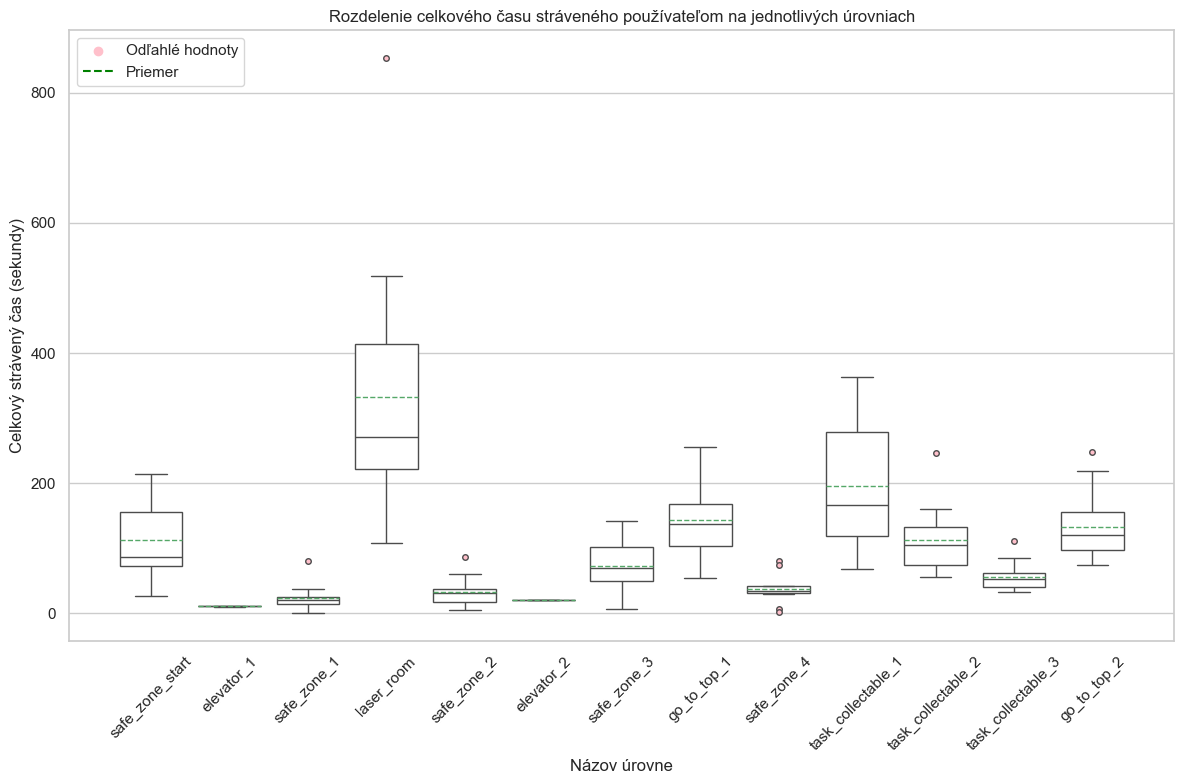

In [188]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=timeperlevel_all, x='levelName', y='total_seconds', boxprops=dict(facecolor='white'), meanline=True, showmeans=True, flierprops=dict(marker='o', markerfacecolor='pink', markersize=4))
plt.title('Rozdelenie celkového času stráveného používateľom na jednotlivých úrovniach')
plt.xlabel('Názov úrovne')
plt.ylabel('Celkový strávený čas (sekundy)')
plt.xticks(rotation=45)
plt.tight_layout()

plt.scatter([], [], color='pink', label='Odľahlé hodnoty')
plt.plot([], linestyle='--', color='green', label='Priemer')
plt.legend(loc='upper left')

plt.show()